<a href="https://colab.research.google.com/github/mehrnaz1368/classification/blob/main/Clustering_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hierarchical clustering 
another unsupervised machine learning algorithm, which is used to group the unlabeled datasets into a cluster and also known as hierarchical cluster analysis or HCA.

In [36]:
import pandas as pd
import numpy as np
data= pd.read_csv('customer.csv')
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


# Convert qualitative to quantitative data

In [37]:
data['Gender'].replace(['Male', 'Female'], [0,1], inplace=True)
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1       0   19                  15                      39
1           2       0   21                  15                      81
2           3       1   20                  16                       6
3           4       1   23                  16                      77
4           5       1   31                  17                      40


#Normalization

In [38]:
from sklearn.preprocessing import MinMaxScaler
x = data.iloc[:, 1:]
x

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


In [39]:
min_max_scaler = MinMaxScaler()
y = min_max_scaler.fit_transform(x)
y[0:5]

array([[0.        , 0.01923077, 0.        , 0.3877551 ],
       [0.        , 0.05769231, 0.        , 0.81632653],
       [1.        , 0.03846154, 0.00819672, 0.05102041],
       [1.        , 0.09615385, 0.00819672, 0.7755102 ],
       [1.        , 0.25      , 0.01639344, 0.39795918]])

In [40]:
import scipy
leng = y.shape[0]
D = scipy.zeros([leng, leng])
for i in range(leng):
  for j in range(leng):
    D[i, j] = scipy.spatial.distance.euclidean(y[i], y[j])

<ipython-input-40-a8729536e88b>:3: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  D = scipy.zeros([leng, leng])


#we use Ward's linkage, which seeks to minimize the variance between clusters
Hierarchical clustering is a popular method for grouping objects. Clusters are visually represented in a hierarchical tree called a dendrogram.
#the Ward method
  minimize the sum of the squared distances of the points from the cluster centers.the Ward method is less susceptible to noise and outliers. Therefore, Ward's method is preferred more than others in clustering.

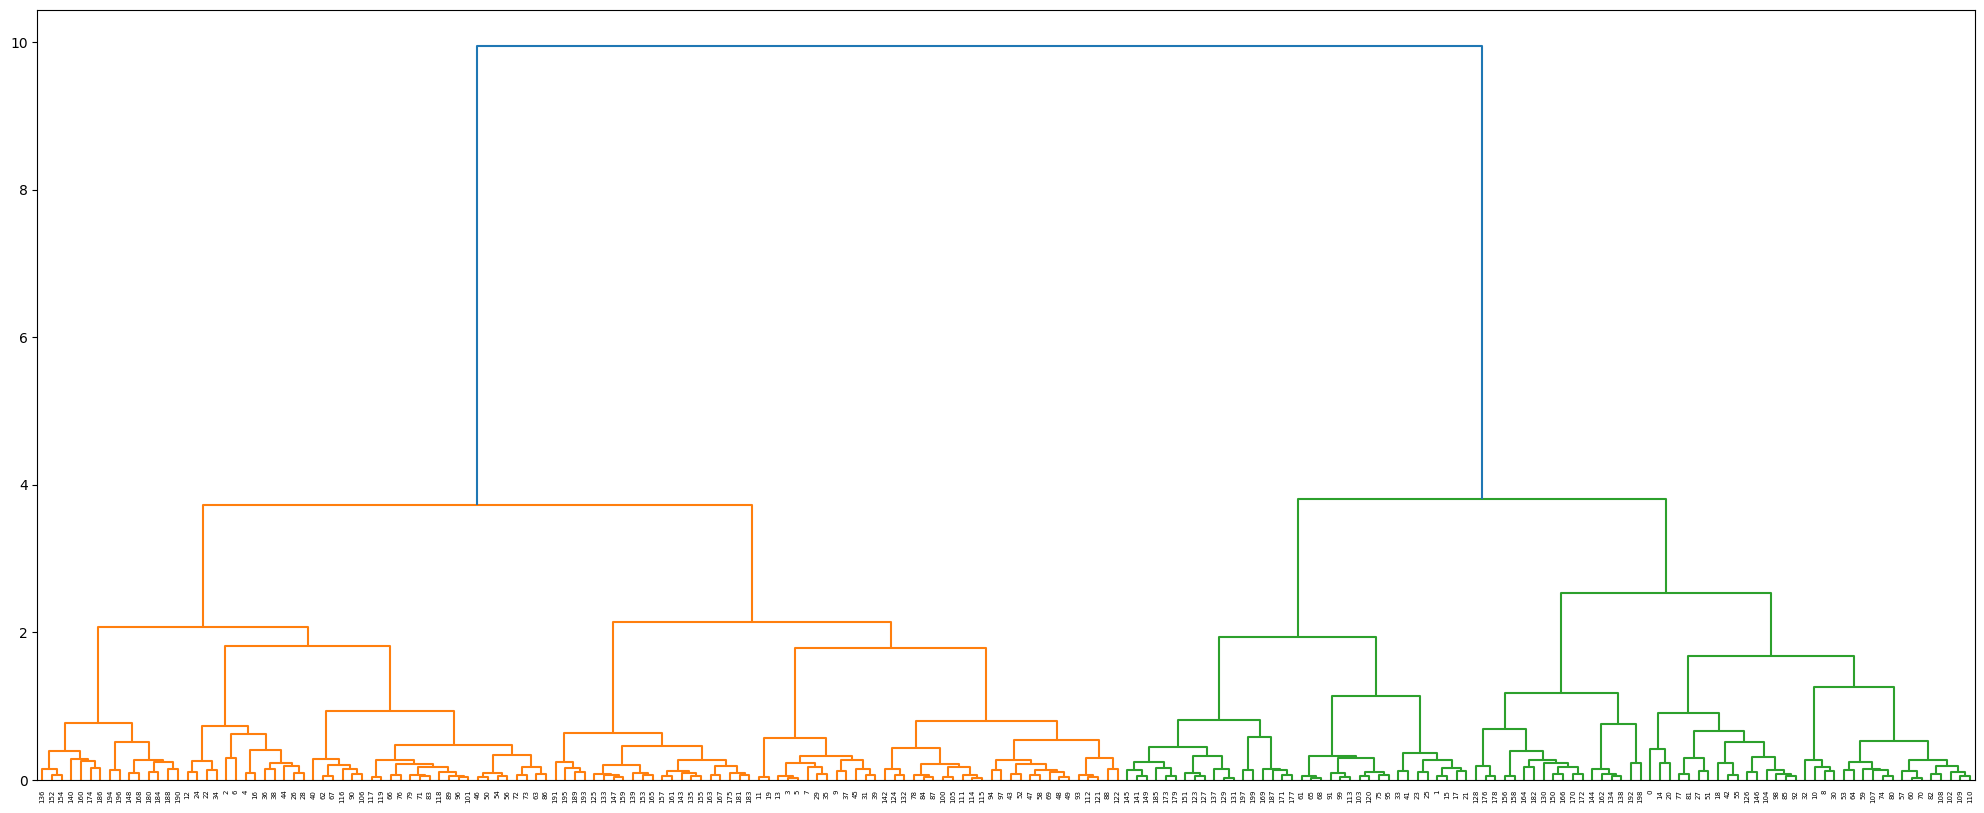

In [41]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
Z = linkage(y, 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)